<a href="https://colab.research.google.com/github/ZHAOTransparentAI/Pytorch-Tutorial/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network



*   Input Layer
*   Hidden Layers
*   Output Layer



In [197]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [198]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer(4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2(n) -> ...->
  # Output
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [199]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of Model
model = Model()

model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [202]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [203]:
# Train Test Split! Set X, y
X = my_df.drop('variety', axis =1)
y = my_df['variety']

In [204]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=32)

In [207]:
# Convert X features to tensors float
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [208]:
# Convert y labels  to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [209]:
# Set the criterion of model to measure the loss
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr
Optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

In [210]:
# Train our model
# Epoch? (one run thru all the training data in our network)

epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch:{i} and loss:{loss}')

  # Do some back propagation: take the error of forward propagation and feed it back
  # Thru the network to fine tune the weights
  Optimizer.zero_grad()
  loss.backward()
  Optimizer.step()

Epoch:0 and loss:1.1225894689559937
Epoch:10 and loss:1.0135607719421387
Epoch:20 and loss:0.8206457495689392
Epoch:30 and loss:0.598098635673523
Epoch:40 and loss:0.4137578308582306
Epoch:50 and loss:0.2832970917224884
Epoch:60 and loss:0.19361941516399384
Epoch:70 and loss:0.1366386115550995
Epoch:80 and loss:0.10245425999164581
Epoch:90 and loss:0.08336663991212845


Text(0.5, 0, 'Epoch')

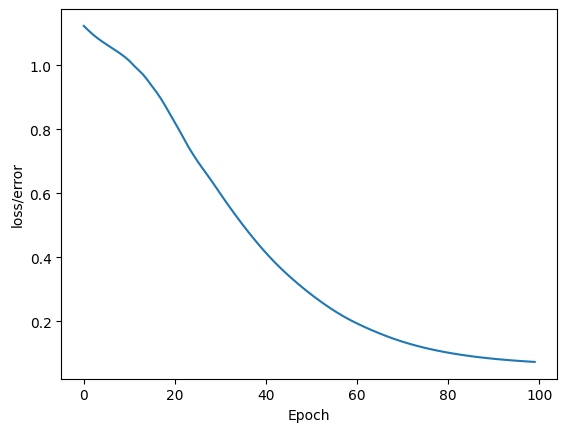

In [211]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [212]:
# Evaluate Model on Test Data Set
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [213]:
loss

tensor(0.0570)

In [214]:

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
    # print(f'{i+1}.)  {str(y_val)} \t {x} \t {y_val.argmax().item()}')


    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-4.1463,  5.0282,  2.5055]) 	 1 	 1
2.)  tensor([ 5.1142, -2.7576, -3.1783]) 	 0 	 0
3.)  tensor([ 4.0352, -1.7570, -2.6939]) 	 0 	 0
4.)  tensor([-4.6162,  5.5497,  2.6854]) 	 1 	 1
5.)  tensor([-6.1847,  4.2124,  6.8947]) 	 2 	 2
6.)  tensor([-7.4786,  5.6410,  7.4071]) 	 2 	 2
7.)  tensor([ 3.5939, -1.3372, -2.5116]) 	 0 	 0
8.)  tensor([ 4.2962, -2.0118, -2.7961]) 	 0 	 0
9.)  tensor([-4.2421,  5.4835,  2.1355]) 	 1 	 1
10.)  tensor([ 4.5124, -2.1952, -2.9039]) 	 0 	 0
11.)  tensor([-4.7493,  5.8288,  2.5745]) 	 1 	 1
12.)  tensor([-7.2520,  4.4656,  8.3614]) 	 2 	 2
13.)  tensor([-2.8918,  4.6705,  0.7947]) 	 1 	 1
14.)  tensor([-2.9833,  4.7886,  0.8439]) 	 1 	 1
15.)  tensor([-6.5849,  4.7801,  6.8767]) 	 2 	 2
16.)  tensor([-6.8378,  3.8055,  8.4303]) 	 2 	 2
17.)  tensor([-4.4287,  4.8880,  3.1420]) 	 1 	 1
18.)  tensor([-5.9769,  4.8211,  5.8025]) 	 2 	 2
19.)  tensor([-3.2091,  4.9927,  0.9574]) 	 1 	 1
20.)  tensor([ 5.0460, -2.6825, -3.1411]) 	 0 	 0
21.)  ten

In [215]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.7])

In [216]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 3.5122, -1.2725, -2.4671])


In [217]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [218]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-6.0069,  4.4009,  6.3610])


In [219]:
# Save our NN Model  (weights and bias)
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [220]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [221]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)